In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from eval7 import Deck, Card
from utils.equity import hand_vs_hand_equity, hand_vs_random_hand_equity
from utils.parallelize import process_map

In [28]:
def compute_equity(hero_hand: str, villain_hand: str) -> dict[str, float]:
    hero_equity = hand_vs_random_hand_equity(hero_hand, 1000)
    villain_equity = hand_vs_random_hand_equity(villain_hand, 1000)
    r = hero_equity / villain_equity
    real_equity = hand_vs_hand_equity(hero_hand, villain_hand, 1000)
    return {"R": r, "Equity": real_equity}

In [29]:
def hand_str(cards: list[Card]) -> str:
    return "".join(str(c) for c in cards)
    
def compute_samples(n: int = 10_000) -> pd.DataFrame:
    samples = []
    for i in range(n):
        deck = Deck()
        deck.shuffle()
        hero_hand = hand_str(deck.deal(2))
        villain_hand = hand_str(deck.deal(2))
        sample = compute_equity(hero_hand, villain_hand)
        sample["hero_hand"] = hero_hand
        sample["villain_hand"] = villain_hand
        samples.append(sample)
    return pd.DataFrame(data=samples)

In [30]:
df = compute_samples(n=100)

In [41]:
model = ols("Equity ~ R", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Equity   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           7.62e-29
Time:                        21:32:49   Log-Likelihood:                 96.822
No. Observations:                 100   AIC:                            -189.6
Df Residuals:                      98   BIC:                            -184.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0868      0.027      3.220      0.002       0.033       0.140
R              0.3847      0.024     15.876      0.000       0.337       0.433
==============================================================================
Omnibus:                        5.131   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.922
Skew:                          -0.543   Prob(JB):                       0.0853
Kurtosis:                       3.011   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='R', ylabel='Equity'>

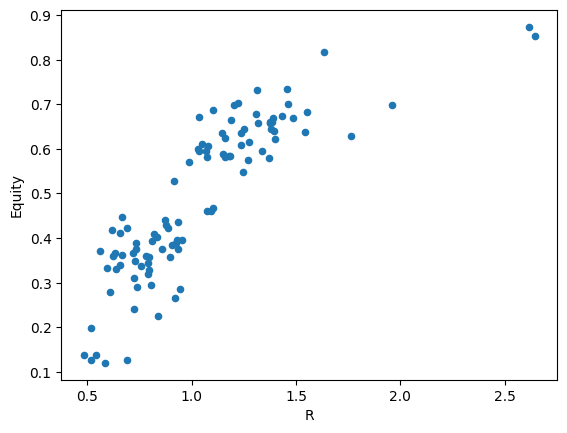

In [42]:
df.plot.scatter(x="R", y="Equity")